Descripció

Aprèn a realitzar mostreig de les dades amb Python.


- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('MLB.txt',sep='\t')

In [3]:
df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [4]:
df.describe()

,salary
count,828.000000
mean,3281.828339
std,4465.448980
min,400.000000
25%,418.315000
50%,1093.750000
75%,4250.000000
max,33000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [6]:
df.shape

(828, 4)

Random sample with 75 items

In [7]:
radoms_sample=df.sample(n=75, random_state=1)

In [8]:
radoms_sample.shape

(75, 4)

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

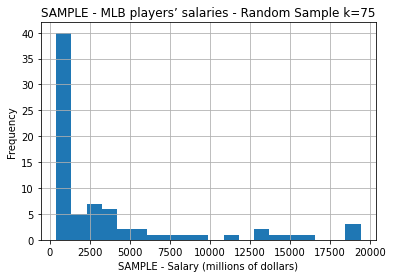

In [9]:
radoms_sample.hist(['salary'], bins=20)
plt.title('SAMPLE - MLB players’ salaries - Random Sample k=75')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'POPULATION - Salary (millions of dollars)')

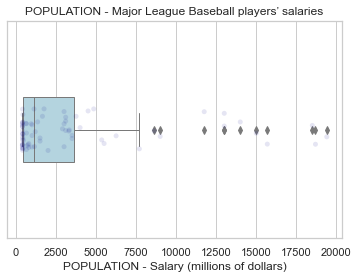

In [10]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=radoms_sample["salary"], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
ax = sns.stripplot(x=radoms_sample["salary"], color='darkblue', alpha=0.1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

In [11]:
# Define systematic sampling function
def sys_samp(df, step,start=0):
    systematic_sample=df.iloc[start::step]
    return systematic_sample

In [12]:
systematic_sampling=sys_samp(df,5,3)
systematic_sampling

,player,team,position,salary
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.000
8,Conor Jackson,Arizona Diamondbacks,First Baseman,3100.000
13,Mark Reynolds,Arizona Diamondbacks,Third Baseman,833.333
18,Juan C. Gutierrez,Arizona Diamondbacks,Pitcher,411.000
23,Ian Kennedy,Arizona Diamondbacks,Pitcher,403.000
...,...,...,...,...
803,Matt Capps,Washington Nationals,Pitcher,3500.000
808,Adam Kennedy,Washington Nationals,Second Baseman,1250.000
813,Wil Nieves,Washington Nationals,Catcher,700.000
818,Alberto Gonzalez,Washington Nationals,Shortstop,415.500


In [13]:
systematic_sampling2=sys_samp(df,7)
systematic_sampling2

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
7,Stephen Drew,Arizona Diamondbacks,Shortstop,3400.0
14,Augie Ojeda,Arizona Diamondbacks,Shortstop,825.0
21,Gerardo Parra,Arizona Diamondbacks,Outfielder,405.5
28,Tim Hudson,Atlanta Braves,Pitcher,9000.0
...,...,...,...,...
798,Adam Dunn,Washington Nationals,First Baseman,12000.0
805,Chien-Ming Wang,Washington Nationals,Pitcher,2000.0
812,Jesus Flores,Washington Nationals,Catcher,750.0
819,Garrett Mock,Washington Nationals,Pitcher,411.0


Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

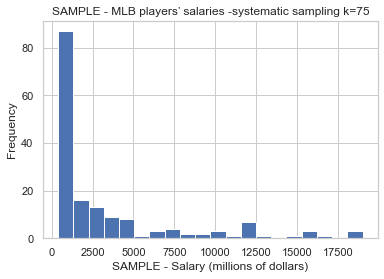

In [14]:
systematic_sampling.hist(['salary'], bins=20)
plt.title('SAMPLE - MLB players’ salaries -systematic sampling k=75')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

In [15]:
systematic_sampling.shape

(165, 4)

Text(0.5, 0, 'POPULATION - Salary (millions of dollars)')

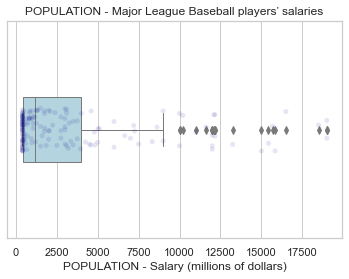

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=systematic_sampling["salary"], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
ax = sns.stripplot(x=systematic_sampling["salary"], color='darkblue', alpha=0.1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

- Exercici 2

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
MLBStratified = df.groupby('position', group_keys = True).apply(pd.DataFrame.sample, frac=.145)
MLBStratified.head()

player                  team position  salary
position                                                         
Catcher  226  Miguel Olivo      Colorado Rockies  Catcher  2000.0
         812  Jesus Flores  Washington Nationals  Catcher   750.0
         700   Jason LaRue   St. Louis Cardinals  Catcher   950.0
         253  Gerald Laird        Detroit Tigers  Catcher  3950.0
         320   J.R. Towles        Houston Astros  Catcher   406.5

In [19]:
MLBStratified.describe()

,salary
count,120.000000
mean,3460.042475
std,4816.464621
min,400.000000
25%,423.250000
50%,1000.000000
75%,4550.000000
max,22600.000000


In [20]:
MLBStratified2 = df.groupby('salary', group_keys = True).apply(pd.DataFrame.sample, frac=.145)
MLBStratified2.head()

player                team        position  salary
salary                                                                 
400.0  686  Kanekoa Texeira    Seattle Mariners         Pitcher   400.0
       215    Hector Ambriz   Cleveland Indians         Pitcher   400.0
       50     Brooks Conrad      Atlanta Braves  Second Baseman   400.0
       184   Juan Francisco     Cincinnati Reds   Third Baseman   400.0
       604      John Raynor  Pittsburgh Pirates      Outfielder   400.0

In [21]:
MLBStratified2.describe()

,salary
count,68.000000
mean,2555.301471
std,3520.813514
min,400.000000
25%,412.125000
50%,925.000000
75%,3137.500000
max,15000.000000


# Creo muestra estratificada usando stratify de scikit-learn

In [159]:
train, test = train_test_split(df, stratify = df["position"],random_state=7,test_size=414)

In [160]:
train.head()

,player,team,position,salary
406,Blake DeWitt,Los Angeles Dodgers,Third Baseman,410.0
690,Kyle Lohse,St. Louis Cardinals,Pitcher,9187.5
792,Ricky Romero,Toronto Blue Jays,Pitcher,408.3
662,Chone Figgins,Seattle Mariners,Second Baseman,8500.0
716,Jason Bartlett,Tampa Bay Rays,Shortstop,4000.0


In [161]:
train.shape

(414, 4)

In [162]:
test.shape

(414, 4)

In [163]:
test.head()

,player,team,position,salary
604,John Raynor,Pittsburgh Pirates,Outfielder,400.0
560,Shane Victorino,Philadelphia Phillies,Outfielder,5000.0
129,Geovany Soto,Chicago Cubs,Catcher,575.0
711,Nick Stavinoha,St. Louis Cardinals,Outfielder,400.0
315,Humberto Quintero,Houston Astros,Catcher,750.0


In [164]:
test.describe(include = 'all')

,player,team,position,salary
count,414,414,414,414.000000
unique,414,30,9,NaN
top,Josh Willingham,Cincinnati Reds,Pitcher,NaN
freq,1,20,205,NaN
mean,NaN,NaN,NaN,3312.172819
std,NaN,NaN,NaN,4521.066798
min,NaN,NaN,NaN,400.000000
25%,NaN,NaN,NaN,416.000000
50%,NaN,NaN,NaN,1150.000000
75%,NaN,NaN,NaN,4087.500000


In [165]:
train.describe(include = 'all')

,player,team,position,salary
count,414,414,414,414.000000
unique,414,30,9,NaN
top,Rafael Perez,Texas Rangers,Pitcher,NaN
freq,1,21,205,NaN
mean,NaN,NaN,NaN,3251.483860
std,NaN,NaN,NaN,4414.392325
min,NaN,NaN,NaN,400.000000
25%,NaN,NaN,NaN,420.000000
50%,NaN,NaN,NaN,1000.000000
75%,NaN,NaN,NaN,4500.000000


In [157]:
train.groupby("position").count()/len(train)

,player,team,salary
position,,,
Catcher,0.082126,0.082126,0.082126
Designated Hitter,0.007246,0.007246,0.007246
First Baseman,0.050725,0.050725,0.050725
Infielder,0.004831,0.004831,0.004831
Outfielder,0.178744,0.178744,0.178744
Pitcher,0.495169,0.495169,0.495169
Second Baseman,0.057971,0.057971,0.057971
Shortstop,0.067633,0.067633,0.067633
Third Baseman,0.055556,0.055556,0.055556


In [166]:
test.groupby("position").count()/len(train)

,player,team,salary
position,,,
Catcher,0.079710,0.079710,0.079710
Designated Hitter,0.009662,0.009662,0.009662
First Baseman,0.050725,0.050725,0.050725
Infielder,0.004831,0.004831,0.004831
Outfielder,0.178744,0.178744,0.178744
Pitcher,0.495169,0.495169,0.495169
Second Baseman,0.057971,0.057971,0.057971
Shortstop,0.067633,0.067633,0.067633
Third Baseman,0.055556,0.055556,0.055556


Generate sample using SMOTE (Synthetic Minority Oversampling Technique).

Original dataset shape Counter({1: 90, 0: 10})


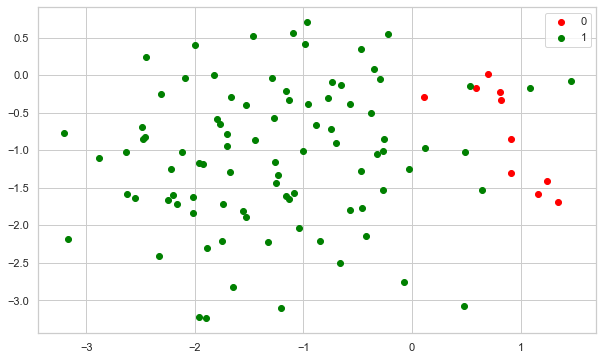

In [22]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.1, 0.9], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1, n_samples=100, random_state=10)

print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 90, 0: 10})

label_c = {0: 'red', 1: 'green'}

plt.figure(figsize=[10, 6])
for label in np.unique(y):
    ind = np.where(y == label)
    plt.scatter(X[ind][:, 0], X[ind][:, 1], c=label_c[label], label=label)
plt.legend()

In [24]:
m = SMOTE(k_neighbors=3, sampling_strategy=0.2, random_state=11)
X_res, y_res = m.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 90, 0: 18})


In [25]:
print(sorted(Counter(y).items()))

[(0, 10), (1, 90)]


In [26]:
print(sorted(Counter(y_res).items()))

[(0, 18), (1, 90)]


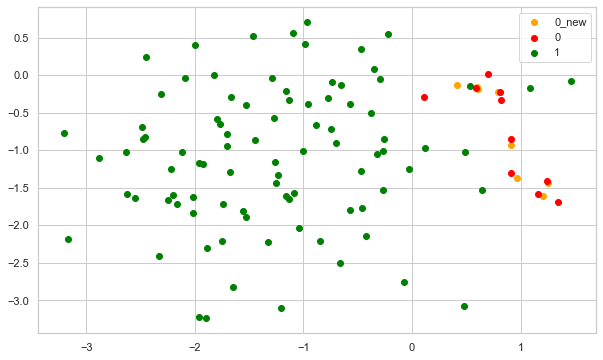

In [27]:
label_c = {0: 'red', 1: 'green'}

plt.figure(figsize=[10, 6])
for label in np.unique(y_res):
    ind = np.where(y_res == label)
    if label == 0:
        plt.scatter(X_res[ind][-8:, 0], X_res[ind][-8:, 1], c='orange', label='0_new')
        plt.scatter(X_res[ind][:-8, 0], X_res[ind][:-8, 1], c=label_c[label], label=label)
    else:
        plt.scatter(X_res[ind][:, 0], X_res[ind][:, 1], c=label_c[label], label=label)
plt.legend()

- Exercici 3

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [28]:
def Reservoir_Sampling(steam,k):
    reservoir = []
    for i, element in enumerate(df.index.tolist()):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element
    return df.iloc[reservoir]

In [29]:
dfs=Reservoir_Sampling(df,5)
dfs

,player,team,position,salary
258,Ramon Santiago,Detroit Tigers,Shortstop,1250.0
745,C.J. Wilson,Texas Rangers,Pitcher,3100.0
582,Octavio Dotel,Pittsburgh Pirates,Pitcher,3250.0
480,Kelvim Escobar,New York Mets,Pitcher,1250.0
385,Casey Blake,Los Angeles Dodgers,Third Baseman,6250.0


In [30]:
dfs=Reservoir_Sampling(df,75)
dfs

,player,team,position,salary
521,Mark Ellis,Oakland Athletics,Second Baseman,5500.0
376,Brandan Wood,Los Angeles Angeles,Shortstop,410.0
322,Bud Norris,Houston Astros,Pitcher,401.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
290,John D. Baker,Florida Marlins,Catcher,415.0
...,...,...,...,...
127,Tom Gorzelanny,Chicago Cubs,Pitcher,800.0
646,Guillermo Mota,San Francisco Giants,Pitcher,750.0
238,Dexter Fowler,Colorado Rockies,Outfielder,406.0
240,Franklin Morales,Colorado Rockies,Pitcher,406.0


Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

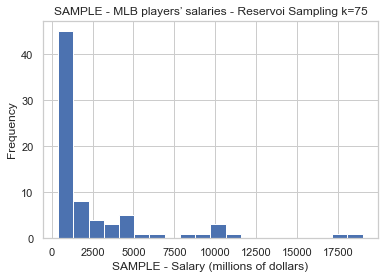

In [31]:
dfs.hist(['salary'], bins=20)
plt.title('SAMPLE - MLB players’ salaries - Reservoi Sampling k=75')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'POPULATION - Salary (millions of dollars)')

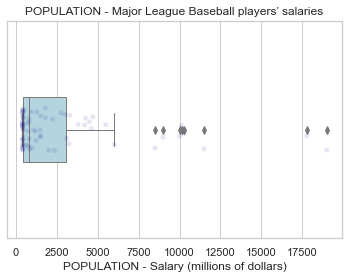

In [32]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dfs["salary"], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
ax = sns.stripplot(x=dfs["salary"], color='darkblue', alpha=0.1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')